In [62]:
import pandas as pd

In [63]:
df = pd.read_csv("../data/scraped-jobs.csv")
df.head()

,title,skills,salary,company,job_description,link
0,Python developer (Middle/Senior),"Користувач ОС Linux,Git,Python,PostgreSQL,Djan...",NaN,Project Ukraine,Pythagoras Technology є частиною екосистеми бр...,https://www.work.ua/en/jobs/5722903/
1,"Python Developer (Scraping), Data engineer","HTML,GitHub,JavaScript,Python,JSON,Знання прин...",16400–22000 UAH,InterBox,Вимоги : Знання Python ; ООП; Базове роз...,https://www.work.ua/en/jobs/5733831/
2,Junior Python Developer (Trainee),"CSS,JavaScript,HTML,SQL,Git,Python,Знання прин...",NaN,"Є Підтримка, АФК, ГО",Компанія E-Support шукає мотивованого та здібн...,https://www.work.ua/en/jobs/5727804/
3,"Senior Software engineer (Node, Python, LLM)","Відповідальність,Ініціативність",NaN,DigitalSuits,About the project The Netherlands company revo...,https://www.work.ua/en/jobs/5733693/
4,Intern Python developer,"Git,Python,Комунікабельність,Програмування,Зна...",NaN,HYS Enterprise,Requirements: Proficiency in Python3 programm...,https://www.work.ua/en/jobs/5644457/


In [64]:
import asyncio
import aiohttp
import nest_asyncio
import time

from deep_translator import GoogleTranslator


nest_asyncio.apply()


translator = GoogleTranslator(source="auto", target="en")

async def translate_text(session, text):
    return translator.translate(text)


async def translate_column(session, column_data):
    tasks = []
    for text in column_data:
        if pd.isna(text):
            tasks.append(asyncio.create_task(asyncio.sleep(0, result=text)))
        else:
            tasks.append(asyncio.create_task(translate_text(session, text)))
    return await asyncio.gather(*tasks)


async def translate_dataframe(df):
    async with aiohttp.ClientSession() as session:
        for column in df.columns:
            df[column] = await translate_column(session, df[column])
    return df


def run_asyncio_task(task):
    start_time = time.time()
    result = asyncio.run(task)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time, result

time_elapsed, translated_df = run_asyncio_task(translate_dataframe(df))
print(time_elapsed)
translated_df

18.945125818252563


,title,skills,salary,company,job_description,link
0,Python developer (Middle/Senior),"Linux OS User,Git,Python,PostgreSQL,Django,Dja...",NaN,Project Ukraine,Pythagoras Technology is part of the ecosystem...,https://www.work.ua/en/jobs/5722903/
1,"Python Developer (Scraping), Data engineer","HTML,GitHub,JavaScript,Python,JSON,Knowledge o...",16400–22000 UAH,InterBox,Requirements: Knowledge of Python; OOP; Bas...,https://www.work.ua/en/jobs/5733831/
2,Junior Python Developer (Trainee),"CSS, JavaScript, HTML, SQL, Git, Python, Knowl...",NaN,"There is Support, AFK, GO",E-Support is looking for a motivated and capab...,https://www.work.ua/en/jobs/5727804/
3,"Senior Software engineer (Node, Python, LLM)","Responsibility, Initiative",NaN,DigitalSuits,About the project The Netherlands company revo...,https://www.work.ua/en/jobs/5733693/
4,Intern Python developer,"Git, Python, Communicability, Programming, Kno...",NaN,HYS Enterprise,Requirements: Proficiency in Python3 programm...,https://www.work.ua/en/jobs/5644457/
5,Python Developer,"Java,PHP,MySQL,Git,GitHub,GitLab,JavaScript,Py...",NaN,PNN Soft,Requirements: Bachelor’s or Master’s degree i...,https://www.work.ua/en/jobs/5536195/
6,Full-stack Python programmer (Strong Junior),"JavaScript,SQL,Python,Communication,Responsibi...",29000 UAH,ANC Pharmacy,"Hello! The leader of the pharmacy market, the ...",https://www.work.ua/en/jobs/5055123/
7,Python developer,"Linux OS user, SQL, Git, Python, Docker, Teamw...",NaN,Canyon Development,Canyon Development is inviting a Python develo...,https://www.work.ua/en/jobs/5706480/
8,"Full Stack Web Developer (Python, Angular 2+)","CSS,JavaScript,HTML,MySQL,SQL,Git,Jira,Python,...",50000–100000 UAH,Lead Capital Group,Вітаєм! Наша компанія зараз в пошуку Full stac...,https://www.work.ua/en/jobs/2714157/
9,Junior Python Developer,"GitHub,Python,Communication,Responsibility,Tea...",14000–20000 UAH,Infobezpeka,About Us: We are a dynamic and innovative com...,https://www.work.ua/en/jobs/5728732/


In [71]:
from collections import Counter


skills_counter = Counter()

for skills_str in translated_df['skills']:
    skills_list = [skill.strip() for skill in skills_str.split(',')]
    skills_counter.update(skills_list)

skills_df = pd.DataFrame.from_dict(skills_counter, orient='index', columns=['usage_count'])

skills_df = skills_df.sort_values(by='usage_count', ascending=False).reset_index()
skills_df

,index,usage_count
0,Python,21
1,Git,12
2,JavaScript,11
3,Django,10
4,PostgreSQL,9
...,...,...
86,KISS,1
87,Productivity,1
88,HTTP,1
89,Kubernetes,1


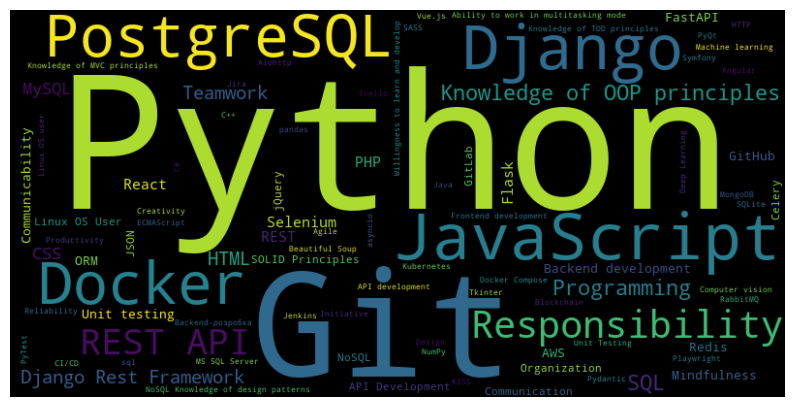

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


wordcloud = WordCloud(
    width=800, height=400, colormap="viridis"
).generate_from_frequencies(skills_counter)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

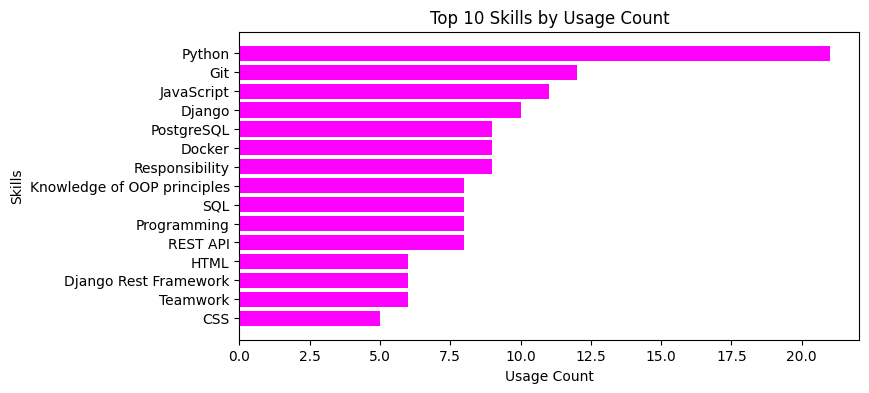

In [73]:
top_skills_df = skills_df.head(15)

plt.figure(figsize=(8, 4))
plt.barh(top_skills_df['index'], top_skills_df['usage_count'], color='magenta')
plt.xlabel('Usage Count')
plt.ylabel('Skills')
plt.title('Top 10 Skills by Usage Count')
plt.gca().invert_yaxis()
plt.show()

In [79]:
mapping = {
    'trainee': 'junior',
    "intern": "junior",
    'middle': 'senior',
}


def map_title(title):
    title_lower = title.lower()
    
    # Replace specific terms with standard ones
    for key, value in mapping.items():
        title_lower = title_lower.replace(key, value)
    
    # Handle cases where 'junior' or 'senior' appears alongside the main title
    if 'junior' in title_lower and "python developer" in title_lower:
        title_lower = "junior python developer"
    elif 'senior' in title_lower and "python developer" in title_lower:
        title_lower = "senior python developer"
    
    return title_lower

translated_df['title_standardized'] = translated_df['title'].apply(map_title)
translated_df

,title,skills,salary,company,job_description,link,title_standardized
0,Python developer (Middle/Senior),"Linux OS User,Git,Python,PostgreSQL,Django,Dja...",NaN,Project Ukraine,Pythagoras Technology is part of the ecosystem...,https://www.work.ua/en/jobs/5722903/,senior python developer
1,"Python Developer (Scraping), Data engineer","HTML,GitHub,JavaScript,Python,JSON,Knowledge o...",16400–22000 UAH,InterBox,Requirements: Knowledge of Python; OOP; Bas...,https://www.work.ua/en/jobs/5733831/,"python developer (scraping), data engineer"
2,Junior Python Developer (Trainee),"CSS, JavaScript, HTML, SQL, Git, Python, Knowl...",NaN,"There is Support, AFK, GO",E-Support is looking for a motivated and capab...,https://www.work.ua/en/jobs/5727804/,junior python developer
3,"Senior Software engineer (Node, Python, LLM)","Responsibility, Initiative",NaN,DigitalSuits,About the project The Netherlands company revo...,https://www.work.ua/en/jobs/5733693/,"senior software engineer (node, python, llm)"
4,Intern Python developer,"Git, Python, Communicability, Programming, Kno...",NaN,HYS Enterprise,Requirements: Proficiency in Python3 programm...,https://www.work.ua/en/jobs/5644457/,junior python developer
5,Python Developer,"Java,PHP,MySQL,Git,GitHub,GitLab,JavaScript,Py...",NaN,PNN Soft,Requirements: Bachelor’s or Master’s degree i...,https://www.work.ua/en/jobs/5536195/,python developer
6,Full-stack Python programmer (Strong Junior),"JavaScript,SQL,Python,Communication,Responsibi...",29000 UAH,ANC Pharmacy,"Hello! The leader of the pharmacy market, the ...",https://www.work.ua/en/jobs/5055123/,full-stack python programmer (strong junior)
7,Python developer,"Linux OS user, SQL, Git, Python, Docker, Teamw...",NaN,Canyon Development,Canyon Development is inviting a Python develo...,https://www.work.ua/en/jobs/5706480/,python developer
8,"Full Stack Web Developer (Python, Angular 2+)","CSS,JavaScript,HTML,MySQL,SQL,Git,Jira,Python,...",50000–100000 UAH,Lead Capital Group,Вітаєм! Наша компанія зараз в пошуку Full stac...,https://www.work.ua/en/jobs/2714157/,"full stack web developer (python, angular 2+)"
9,Junior Python Developer,"GitHub,Python,Communication,Responsibility,Tea...",14000–20000 UAH,Infobezpeka,About Us: We are a dynamic and innovative com...,https://www.work.ua/en/jobs/5728732/,junior python developer


In [85]:
title_counter = Counter(translated_df['title_standardized'])

title_df = pd.DataFrame.from_dict(title_counter, orient='index', columns=['usage_count']).reset_index()
title_df = title_df.rename(columns={'index': 'title'})
title_df = title_df.sort_values(by='usage_count', ascending=False).reset_index(drop=True)


title_df

,title,usage_count
0,python developer,4
1,junior python developer,4
2,senior python developer,2
3,python programmer,2
4,"senior software engineer (node, python, llm)",1
5,"python developer (scraping), data engineer",1
6,full-stack python programmer (strong junior),1
7,"full stack web developer (python, angular 2+)",1
8,computer vision python engineer,1
9,full stack python developer,1


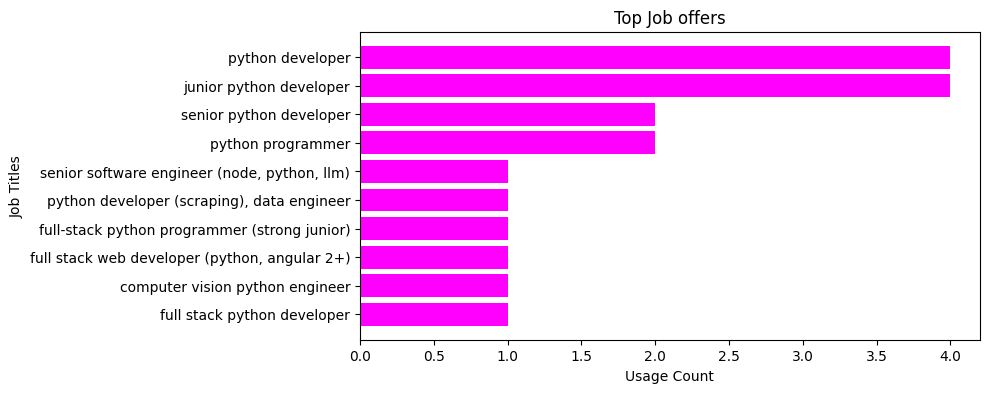

In [89]:
top_offers = title_df.head(10)

plt.figure(figsize=(8, 4))
plt.barh(top_offers['title'], top_offers['usage_count'], color='magenta')
plt.xlabel('Usage Count')
plt.ylabel('Job Titles')
plt.title('Top Job offers')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

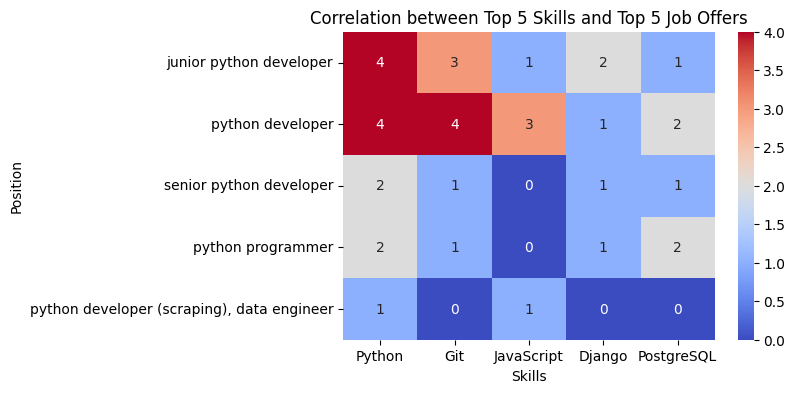

In [98]:
import seaborn as sns


skills_counter = Counter()

title_counter = Counter(translated_df['title_standardized'])

for skills_list in translated_df['skills']:
    skills_counter.update(skills_list)

top_skills = [skill for skill, _ in skills_counter.most_common(5)]
top_titles = [title for title, _ in title_counter.most_common(5)]

correlation_matrix = pd.DataFrame(0, index=top_titles, columns=top_skills)

for index, row in translated_df.iterrows():
    title = row['title_standardized']
    skills = row['skills']
    for skill in skills:
        if skill in top_skills and title in top_titles:
            correlation_matrix.at[title, skill] += 1

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Correlation between Top 5 Skills and Top 5 Job Offers')
plt.xlabel('Skills')
plt.ylabel('Position')
plt.show()